In [8]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_excel('./datasets/LFR2023_SectionI.xlsx', sheet_name='I3', skiprows=6)
momi3 = df.copy()
momi3

,Unnamed: 0,Unnamed: 1,Total,Less Than 1 Year,1 Year to Less Than 5\nYears,5 Years to Less Than\n10 Years,10 Years to Less\nThan 20 Years,At Least 20 Years
0,Total,2013.0,1697.9,307.5,591.8,333.9,284.9,179.8
1,NaN,2014.0,1744.3,355.0,585.0,326.6,290.4,187.4
2,NaN,2015.0,1797.0,333.5,626.3,344.0,296.2,196.9
3,NaN,2016.0,1807.0,319.2,646.9,348.9,294.5,197.5
4,NaN,2017.0,1806.9,284.3,646.3,358.8,315.3,202.2
5,NaN,2018.0,1845.7,303.8,636.7,357.7,341.5,206.0
6,NaN,2019.0,1883.9,316.4,630.8,377.2,333.3,226.3
7,NaN,2020.0,1854.5,286.9,649.4,376.0,318.6,223.5
8,NaN,2021.0,1936.8,345.3,636.2,387.1,340.7,227.5
9,NaN,2022.0,2002.4,357.8,637.6,383.8,373.1,250.1


In [10]:
momi3.rename({"Unnamed: 0": "Gender" , "Unnamed: 1" : "Year"} , axis=1 , inplace=True)

In [11]:
momi3.drop([33 ,34] , axis=0 , inplace=True)

In [12]:
# ffill 'gender'
momi3['Gender'].ffill(inplace=True)

In [13]:
# Change year to datetime
momi3["Year"] =momi3['Year'].astype(int)

In [14]:
momi3

,Gender,Year,Total,Less Than 1 Year,1 Year to Less Than 5\nYears,5 Years to Less Than\n10 Years,10 Years to Less\nThan 20 Years,At Least 20 Years
0,Total,2013,1697.9,307.5,591.8,333.9,284.9,179.8
1,Total,2014,1744.3,355.0,585.0,326.6,290.4,187.4
2,Total,2015,1797.0,333.5,626.3,344.0,296.2,196.9
3,Total,2016,1807.0,319.2,646.9,348.9,294.5,197.5
4,Total,2017,1806.9,284.3,646.3,358.8,315.3,202.2
5,Total,2018,1845.7,303.8,636.7,357.7,341.5,206.0
6,Total,2019,1883.9,316.4,630.8,377.2,333.3,226.3
7,Total,2020,1854.5,286.9,649.4,376.0,318.6,223.5
8,Total,2021,1936.8,345.3,636.2,387.1,340.7,227.5
9,Total,2022,2002.4,357.8,637.6,383.8,373.1,250.1


In [15]:
condition =momi3['Gender'] == 'Total'

total_data =momi3[condition]

In [16]:
total_data.set_index('Year' , inplace=True)
total_data.drop(columns=['Gender'] , inplace=True)
total_data

,Total,Less Than 1 Year,1 Year to Less Than 5\nYears,5 Years to Less Than\n10 Years,10 Years to Less\nThan 20 Years,At Least 20 Years
Year,,,,,,
2013,1697.9,307.5,591.8,333.9,284.9,179.8
2014,1744.3,355.0,585.0,326.6,290.4,187.4
2015,1797.0,333.5,626.3,344.0,296.2,196.9
2016,1807.0,319.2,646.9,348.9,294.5,197.5
2017,1806.9,284.3,646.3,358.8,315.3,202.2
2018,1845.7,303.8,636.7,357.7,341.5,206.0
2019,1883.9,316.4,630.8,377.2,333.3,226.3
2020,1854.5,286.9,649.4,376.0,318.6,223.5
2021,1936.8,345.3,636.2,387.1,340.7,227.5


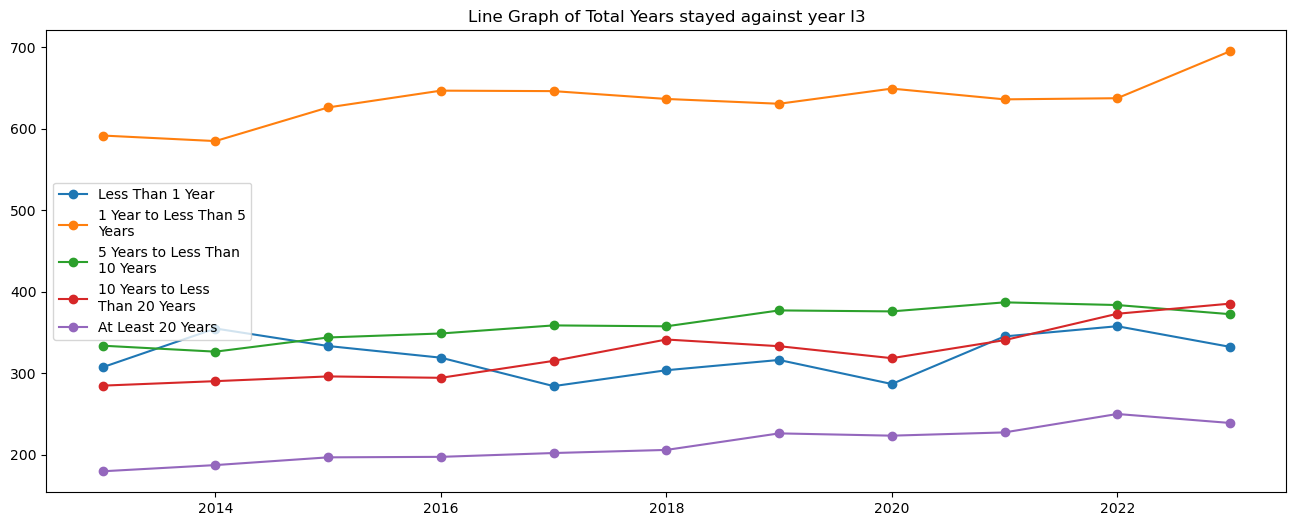

In [17]:
%matplotlib inline
def plot_i3_line(input_data , grouper):
  X = input_data.index
  columns = input_data.columns

  plt.figure(figsize=(16 , 6))

  for i , col in enumerate(columns):
    if col == 'Total':
      continue
    data = input_data[col]
    plt.plot(X , data , marker='o' , label=col)

  plt.title(f'Line Graph of {grouper} Years stayed against year I3')
  plt.legend()
  plt.show()

plot_i3_line(total_data , 'Total')

In [19]:
condition =momi3['Gender'] == 'Male'

male_data =momi3[condition]
male_data.set_index('Year' , inplace=True)
male_data.drop(columns=['Gender'] , inplace=True)

condition =momi3['Gender'] == 'Female'

female_data =momi3[condition]
female_data.set_index('Year' , inplace=True)
female_data.drop(columns=['Gender'] , inplace=True)

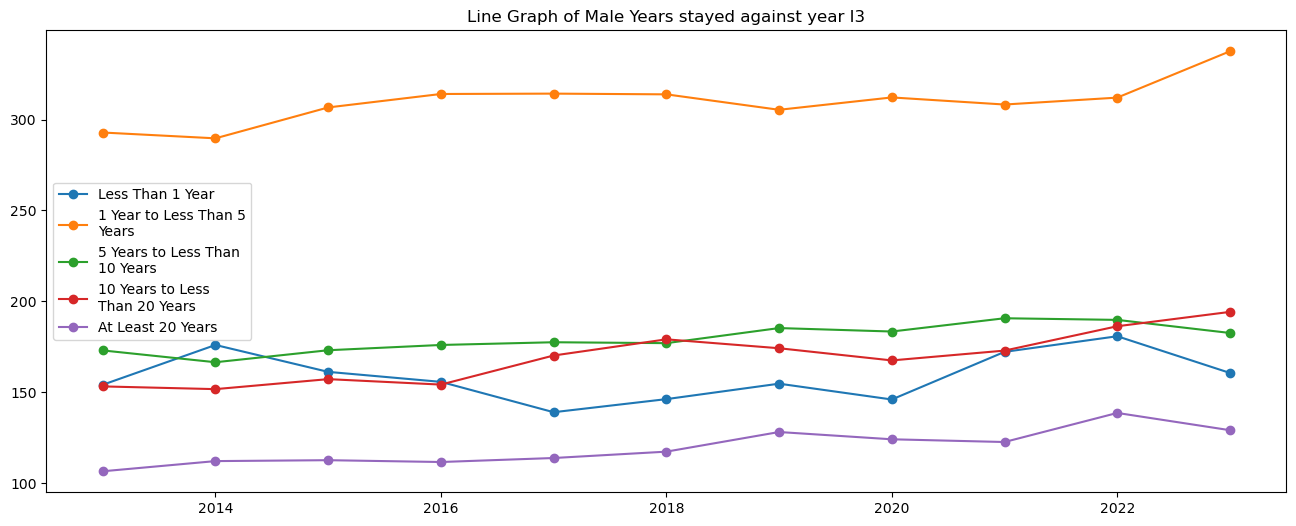

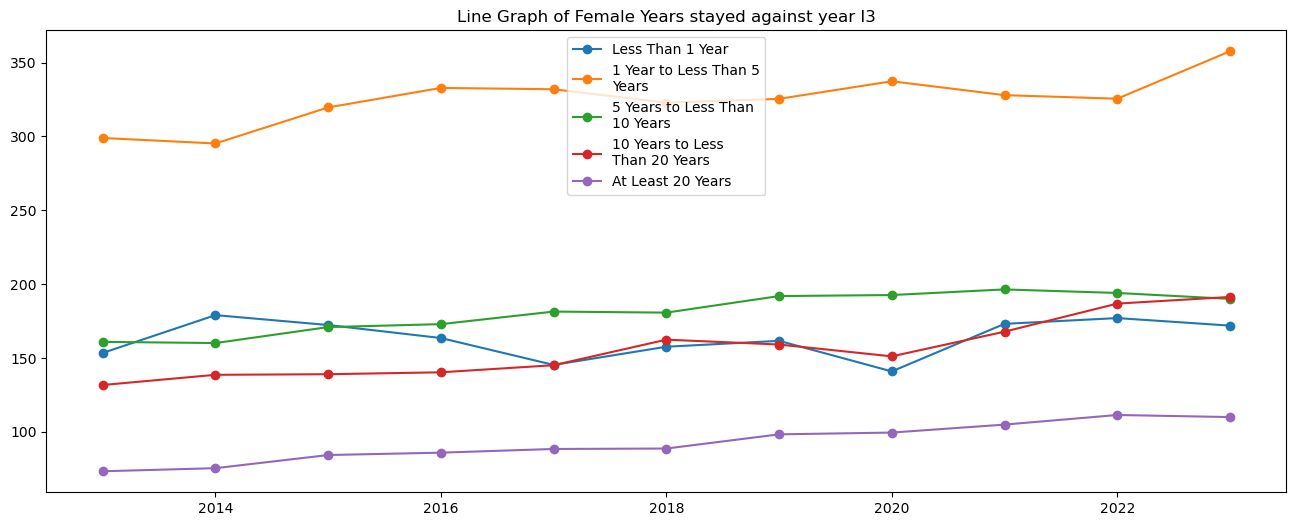

In [ ]:
plot_i3_line(male_data , 'Male')
plot_i3_line(female_data , 'Female')

In [ ]:
%run MOMI4.ipynb

momi4_no_total = df.copy()
momi4_no_total.drop(labels=[37 , 40], axis=0 , inplace=True)
momi4_no_total.set_index('Industry (SSIC 2020)' , inplace=True)
momi4_no_total

,Total,<1 Year,1-5 Years,5-10 Years,10-20 Years,>20 Years
Industry (SSIC 2020),,,,,,
C Manufacturing,198500,22800,52900,35200,49500,38100
F Construction,79100,10200,25800,15400,16600,11200
G Wholesale & Retail Trade,295200,44000,98300,56500,59800,36600
H Transportation & Storage,143900,21500,40700,28400,29500,23800
I Accommodation & Food Services,121800,29600,50600,20000,13800,7800
J Information & Communications,124000,26500,55900,20800,14700,6100
K Financial & Insurance Services,213700,41300,75500,41400,35700,19700
L Real Estate Services,37000,5900,14800,6300,5700,4400
M Professional Services,175300,32400,69800,30800,28700,13600


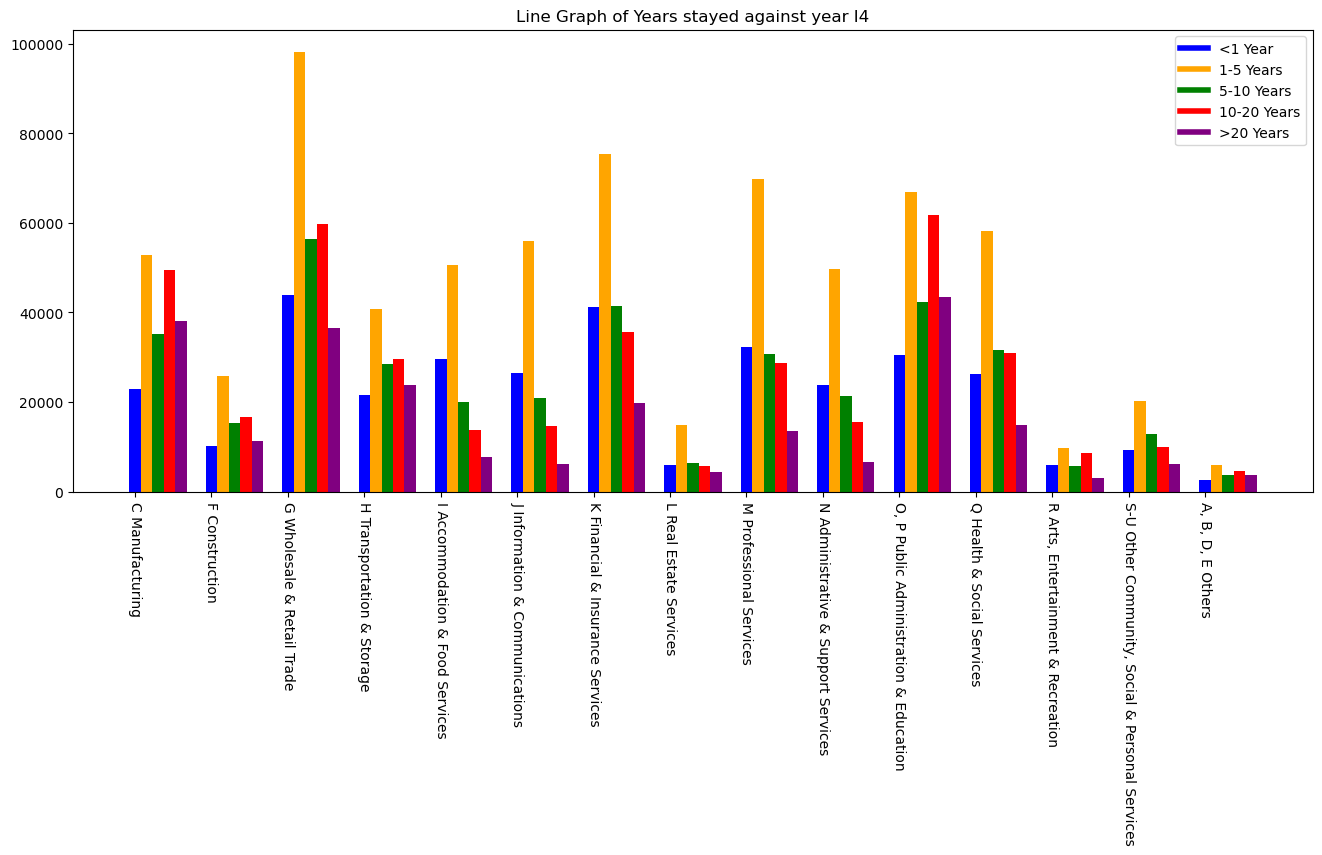

In [ ]:
%matplotlib inline
indexes = momi4_no_total.index
colors = [
  'blue',
  'orange',
  'green',  
  'red',
  'purple',
]

plt.figure(figsize=(16 , 6))

for i , industry in enumerate(indexes):
  data = momi4_no_total.loc[[industry] , :]
  cols = data.columns
  
  for x , col in enumerate(cols):
    if col == 'Total':
      continue
    plt.bar(i + 0.15 * x , data[col] , width=0.15 , color=colors[x -1]) 

    
handles = [
    plt.Line2D([0], [0], color='blue', lw=4),  
    plt.Line2D([0], [0], color='orange', lw=4),  
    plt.Line2D([0], [0], color='green', lw=4),  
    plt.Line2D([0], [0], color='red', lw=4),  
    plt.Line2D([0], [0], color='purple', lw=4),  
]

plt.title(f'Line Graph of Years stayed against year I4')
plt.xticks(np.arange(len(indexes)) + 0.15 , indexes , rotation=270)
plt.legend(handles=handles , labels=list(momi4_no_total.columns[1:]))
plt.show()

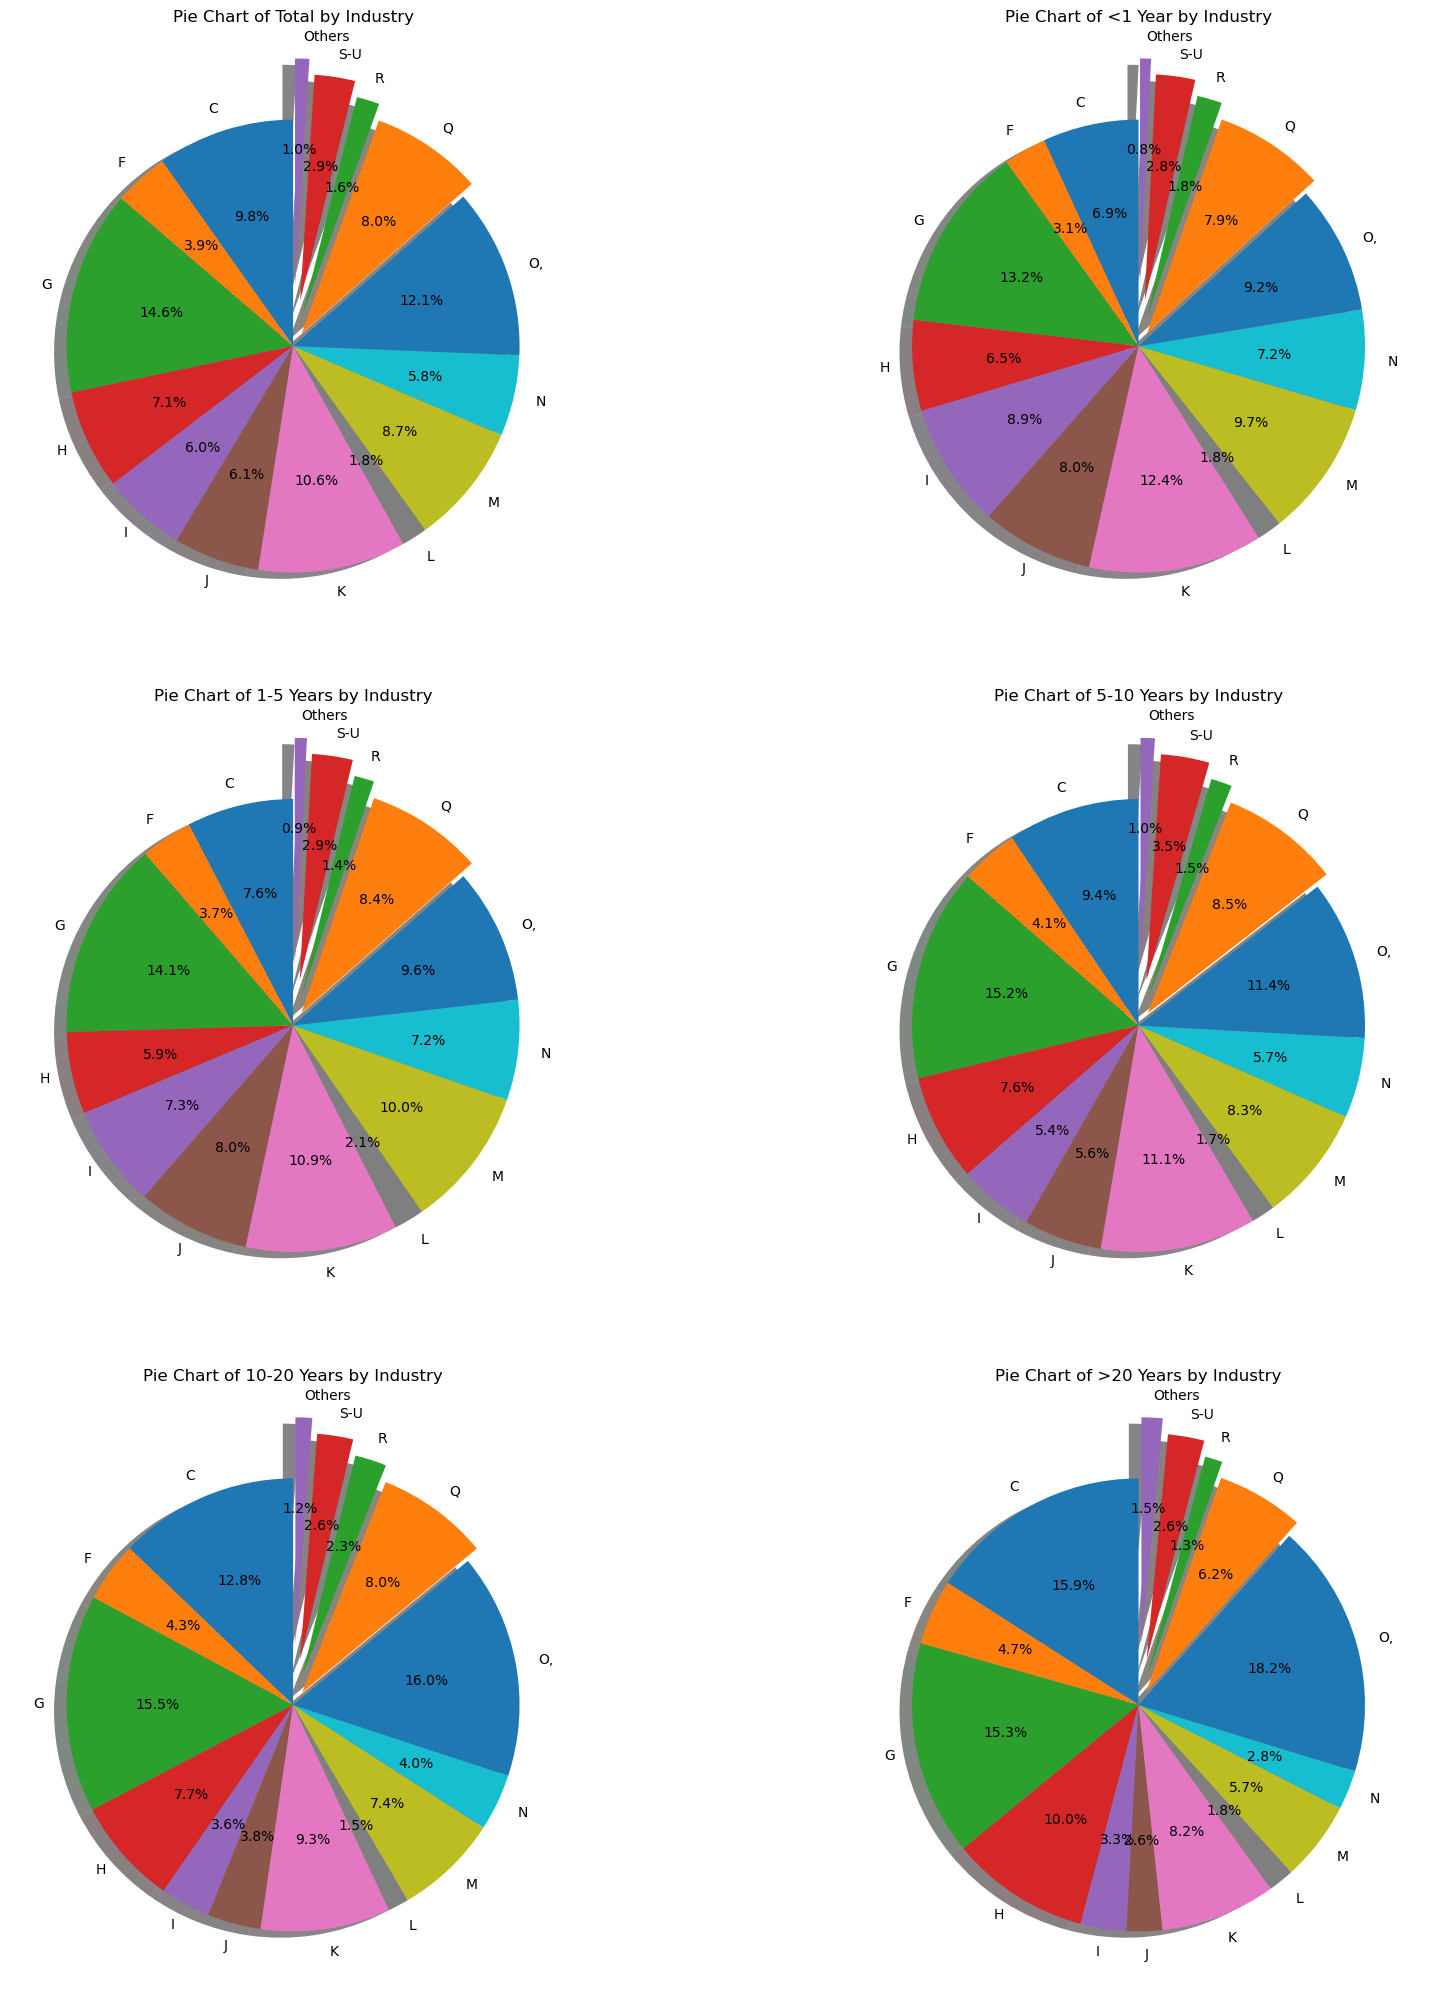

In [ ]:
columns = momi4_no_total.columns
labels = list(map(lambda x :  x.split(' ')[0] if not 'A,' in x.split(' ')[0] else 'Others'  , momi4_no_total.index))
shadow = {'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}

fig , axes = plt.subplots(3 , 2 , figsize=(20 , 25))
axes = axes.flatten()
explode = np.concatenate((np.zeros(10) , np.linspace(0 , 0.27 , 5)))

for i , col in enumerate(columns):
  data = momi4_no_total[col]
  axes[i].pie(data , labels=labels , autopct='%1.1f%%', startangle=90 , shadow=shadow ,explode=explode) 
  axes[i].set_title(f'Pie Chart of {col} by Industry' , pad=30)


plt.show()